In [6]:
import numpy as np
import tensorly as tl
import sparse
import itertools
import networkx as nx
import random as rdm
from tensorly.contrib.sparse import tensor, unfold
from tensorly.contrib.sparse.decomposition import tucker
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.optimize import minimize
from sklearn import metrics

In [106]:
# these data are from https://github.com/arbenson/ScHoLP-Data
# example: [{'edge': ['1', '2'], 'size': 2, 'time': 48942985907},...]
def load_data(directory):
    f_nedge = open(directory + '-nverts.txt', "r")
    f_edge = open(directory + '-simplices.txt', "r")
    f_time = open(directory + '-times.txt', "r")
    #f_label = open(directory + '-simplex-labels.txt', "r")
    result = []
    nodes = set()
    for n in f_nedge:
        size = int(n.rstrip('\n'))
        edge = []
        for v in range(size):
            node = int(f_edge.readline().rstrip('\n'))
            edge.append(node)
            nodes.add(node)
        time = int(f_time.readline().rstrip('\n'))
        #label = f_label.readline().rstrip('\n')
        result.append({'size':size, 'edge':edge, 'time':time})
    f_nedge.close()
    f_edge.close()
    f_time.close()
    #f_label.close()
    print("total number of nodes:", len(nodes))
    return nodes, result

directory = '../code1/tags-ask-ubuntu/tags-ask-ubuntu'
#load_data(directory)

In [107]:
# return weighted graph 
# split by timestamps 
def edge_list(timestamped_edges, ratio = 1, max_dimension = 5):
    result = {}
    size = int(len(timestamped_edges) * ratio)
    for i in range(max_dimension):
        result[i+1] = {}
    #print(result)
    for e in timestamped_edges[:size]:
        if e['size'] <= max_dimension:
            sorted_e = tuple(sorted(e['edge']))
            if sorted_e in result[e['size']].keys():
                result[e['size']][sorted_e] += 1
            else:
                result[e['size']][sorted_e] = 1
    return result

In [108]:
# generate features 
# example input: (edgelist, 4, [3,2]), output ([order3...order3, order2...order2], order4)
# 
def cross_order_features(edgelist, higher_order, lower_orders):
    return null

In [184]:
nodes, timestamped_edges = load_data(directory)
#timestamped_edges

total number of nodes: 3029


In [185]:
edgelist_full = edge_list(timestamped_edges)
edgelist_0_5 = edge_list(timestamped_edges, ratio = 0.5)

In [187]:
#1. 把G3,4,5都放到G2 用networkx的数据结构
#2. 用spectrak clustering算法
#3. NMI
G_2 = edgelist_full[2]
edgelist_full[2][(3,4)]

45

In [180]:
from itertools import combinations
def newdic(n): #n dimensional dataset
    dic = {}
    for line, weight in edgelist_full[n].items():
        alist = list(combinations(line,2))
        for pair in alist:
            dic[pair] = weight
    return dic
#print(edgelist_full[3])
#print(newdic(3))

In [181]:
def merge(dict1,dict2): #combine two dict into one dict
    for key in dict2: 
        if key in dict1: 
            dict2[key] = dict2[key] + dict1[key] 
        else: 
            dict2[key] = dict2[key]
    return dict2

In [188]:
# add three dimensional data to current two dimensional dataset
three = newdic(3)
G_2 = merge(three, G_2)
G_2[(3,4)]

47

In [189]:
# add four dimensional data to current two dimensional dataset
three = newdic(4)
G_2 = merge(three, G_2)
G_2[(3,4)]

48

In [190]:
# add five dimensional data to current two dimensional dataset
three = newdic(5)
G_2 = merge(three, G_2)
G_2[(3,4)]

49

In [250]:
G.clear()

In [216]:
#1. 把G3,4,5都放到G2 
#2.用networkx的数据结构
#3. 用spectrak clustering算法
#4. NMI
#G_2

In [251]:
G = nx.Graph()

In [254]:
#add nodes and edges to Graph G
for pair, w in G_2.items():
    G.add_node(pair[0]) #add nodes
    G.add_node(pair[1])
    G.add_edge(pair[0],pair[1],weight=w) #add edges

In [161]:
#G_2

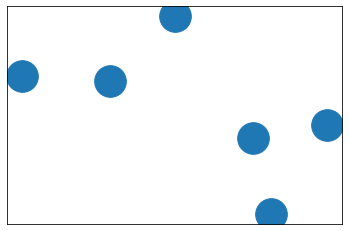

In [215]:
A = nx.Graph()
A.add_edge('a','b',weight=0.6)
A.add_edge('a','c',weight=0.2)
A.add_edge('c','d',weight=0.1)
A.add_edge('c','e',weight=0.7)
A.add_edge('c','f',weight=0.9)
A.add_edge('a','d',weight=0.3)
elarge = [(u,v) for (u,v,d) in A.edges(data=True) if d['weight']>0.5]
esmall = [(u,v) for (u,v,d) in A.edges(data=True) if d['weight']<0.5]
pos = nx.spring_layout(A, seed=17)
nx.draw_networkx_nodes(A,pos,node_size=1000)
